### Aniket Suresh Balkhande 
**Data Science & Business Analytics intern at Sparks Foundation**

**Batch : GRIPAPR2021**



---

## Task 3: Exploratory Data Analysis - Retail
**Objective: As a business manager, try to find out the weak areas where you can work to make more profit. What all business problems you can derive by exploring the data?**

**Dataset: <a href="https://bit.ly/3i4rbWl">here</a>**

---


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 

In [2]:
pwd

'/home/aniket/myprojectdir/GRIPAPR2021/Task3'

In [3]:
df = pd.read_csv('SampleSuperstore.csv')
df.head(4)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310


In [4]:
df.tail(4)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [5]:
df.shape

(9994, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
# checking for the null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
#unique values per column
df.nunique() 

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [9]:
#Total duplicate values
df.duplicated().sum() 

17

In [10]:
#Delete the duplicates
df.drop_duplicates(keep="first", inplace=True)
df.shape

(9977, 13)

In [11]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [12]:
print(df['Category'].unique())

['Furniture' 'Office Supplies' 'Technology']


In [13]:
print(df['Sub-Category'].unique())

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [14]:
print(df['Ship Mode'].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']


<h2>Let's Analyse the profit of the store by compairing any two columns </h2>

---
<h3>Shipping Mode And Profit</h3>

**Which Shipping Mode is giving us more profit ?**

In [15]:
smp = df.groupby(['Ship Mode'], as_index=False)['Profit'].sum().round(2).sort_values("Profit", ascending=False).reset_index(drop=True)
smp.index+=1
percent = []
for i in smp['Profit']: 
    percent.append(i*100//smp['Profit'].sum().round(2))
smp['%'] = percent
smp

,Ship Mode,Profit,%
1,Standard Class,163969.23,57.0
2,Second Class,57446.65,20.0
3,First Class,48953.66,17.0
4,Same Day,15871.89,5.0


More than 50% profit is comming from **Standard Shipping**.

(0.0, 60.0)

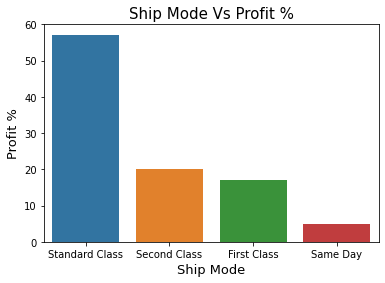

In [16]:
sns.barplot(x = smp['Ship Mode'], y = smp['%']) #ploting the bargraph for the same using seaborn barplot

sns.set_style("whitegrid")
plt.xlabel("Ship Mode", size=13)
plt.ylabel("Profit %", size=13)
plt.title("Ship Mode Vs Profit %", size=15)
plt.ylim(0, 60)



---
<h2>Category Of Product And Profit</h2>

**Which Category of Products are giving us more profit ?**

In [17]:
catp = df.groupby(['Category'], as_index = False)['Profit'].sum().round(2).sort_values("Profit", ascending=False).reset_index(drop=True)
catp.index+=1
catp

,Category,Profit
1,Technology,145454.95
2,Office Supplies,122364.66
3,Furniture,18421.81


**Technology** Category Products are giving us **more profit** followed by **Office Supplies** products. 
Less profit in selling Furniture.

(0.0, 160000.0)

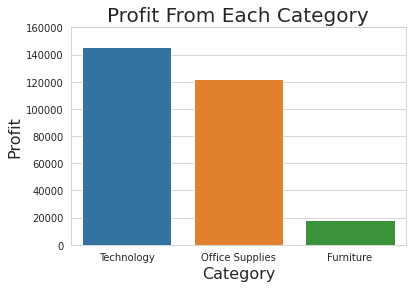

In [18]:
sns.barplot(x = catp['Category'], y = catp['Profit'])

sns.set_style("whitegrid")
plt.xlabel("Category", size=16)
plt.ylabel("Profit", size=16)
plt.title("Profit From Each Category", size=20)
plt.ylim(0,160000)

## Top Sales Among Sub-Category of Products

In [19]:
scs_top = df.groupby(["Sub-Category"], as_index=False)["Sales"].sum().round(2).sort_values("Sales", ascending=False).reset_index(drop=True)
scs_top.index += 1 
scs_top

,Sub-Category,Sales
1,Phones,330007.05
2,Chairs,327777.76
3,Storage,223843.61
4,Tables,206965.53
5,Binders,203409.17
6,Machines,189238.63
7,Accessories,167380.32
8,Copiers,149528.03
9,Bookcases,114880.00
10,Appliances,107532.16


<h4>Highest Selling Product : Phones, Chairs</h4> 
<h4>Least Selling Product : Fasteners </h4>

(0.0, 350000.0)

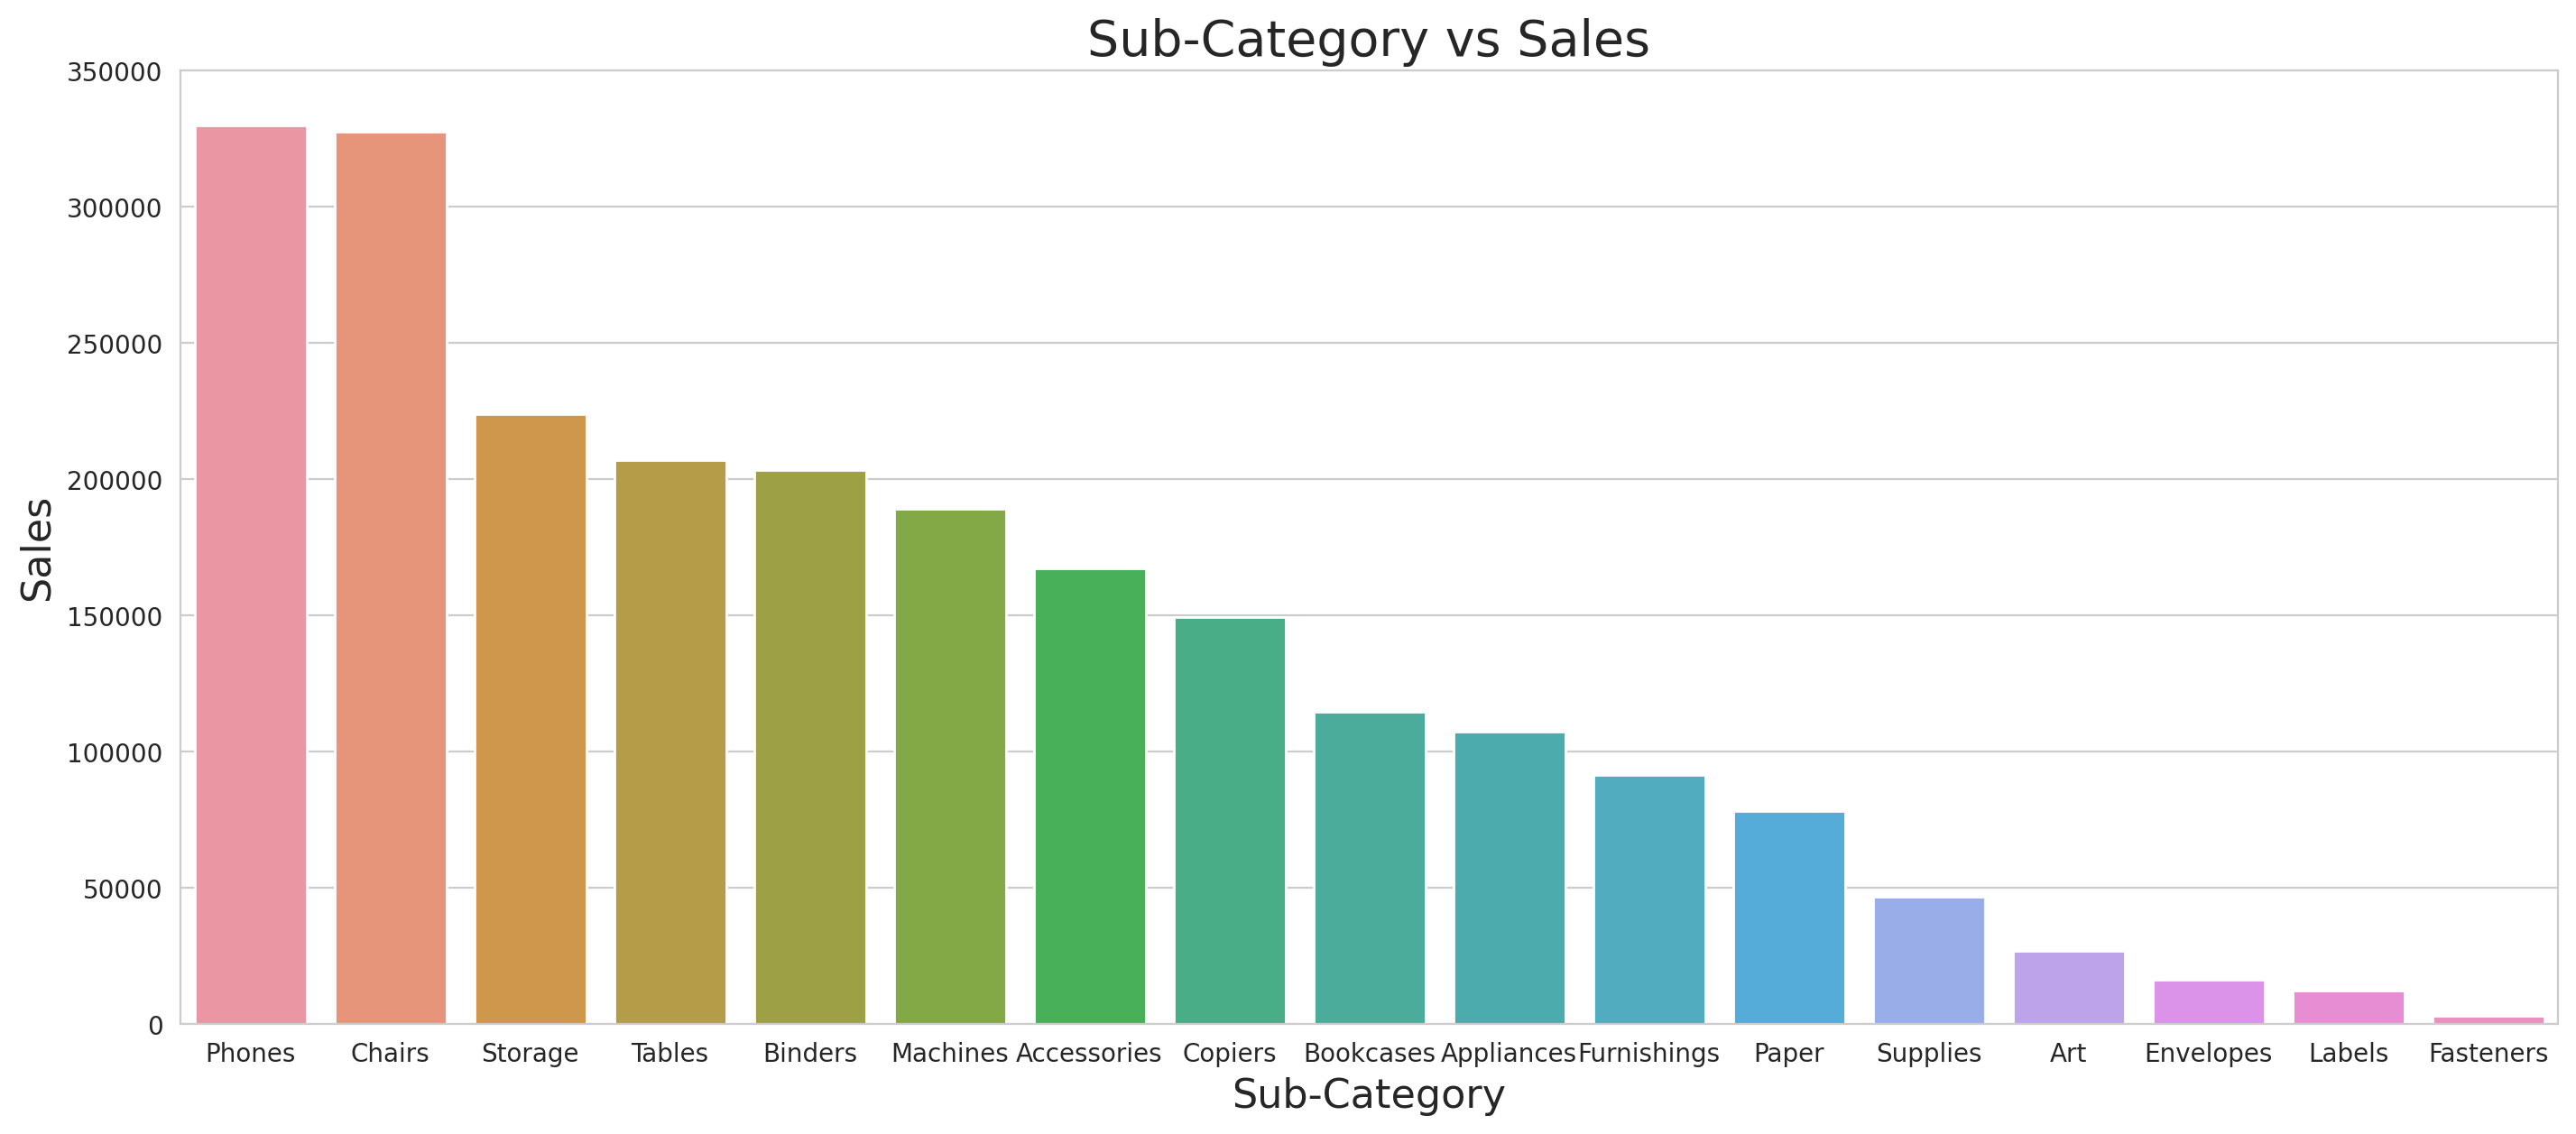

In [20]:
plt.figure(figsize=(17,7),dpi=200)

sns.barplot(x =scs_top['Sub-Category'], y = scs_top['Sales'])

sns.set_style("whitegrid")
plt.xlabel("Sub-Category", size=16)
plt.ylabel("Sales", size=16)
plt.title("Sub-Category vs Sales", size=20)
plt.ylim(0,350000)

### Products And Profit

**Which Sub-Category Products are giving us more profit ?**

In [21]:
scp = df.groupby(["Sub-Category"], as_index=False)["Profit"].sum().round(2).sort_values("Profit", ascending=False).reset_index(drop=True)
scp.index+=1
scp

,Sub-Category,Profit
1,Copiers,55617.82
2,Phones,44515.73
3,Accessories,41936.64
4,Paper,33944.24
5,Binders,30228.00
6,Chairs,26567.13
7,Storage,21278.83
8,Appliances,18138.01
9,Furnishings,13052.72
10,Envelopes,6964.18


**Top profit** giving Products : **Copiers, Phones, Accessories, etc**,<br>
**Least Profit** giving products : **Tables, Bookcases**

(-20000.0, 60000.0)

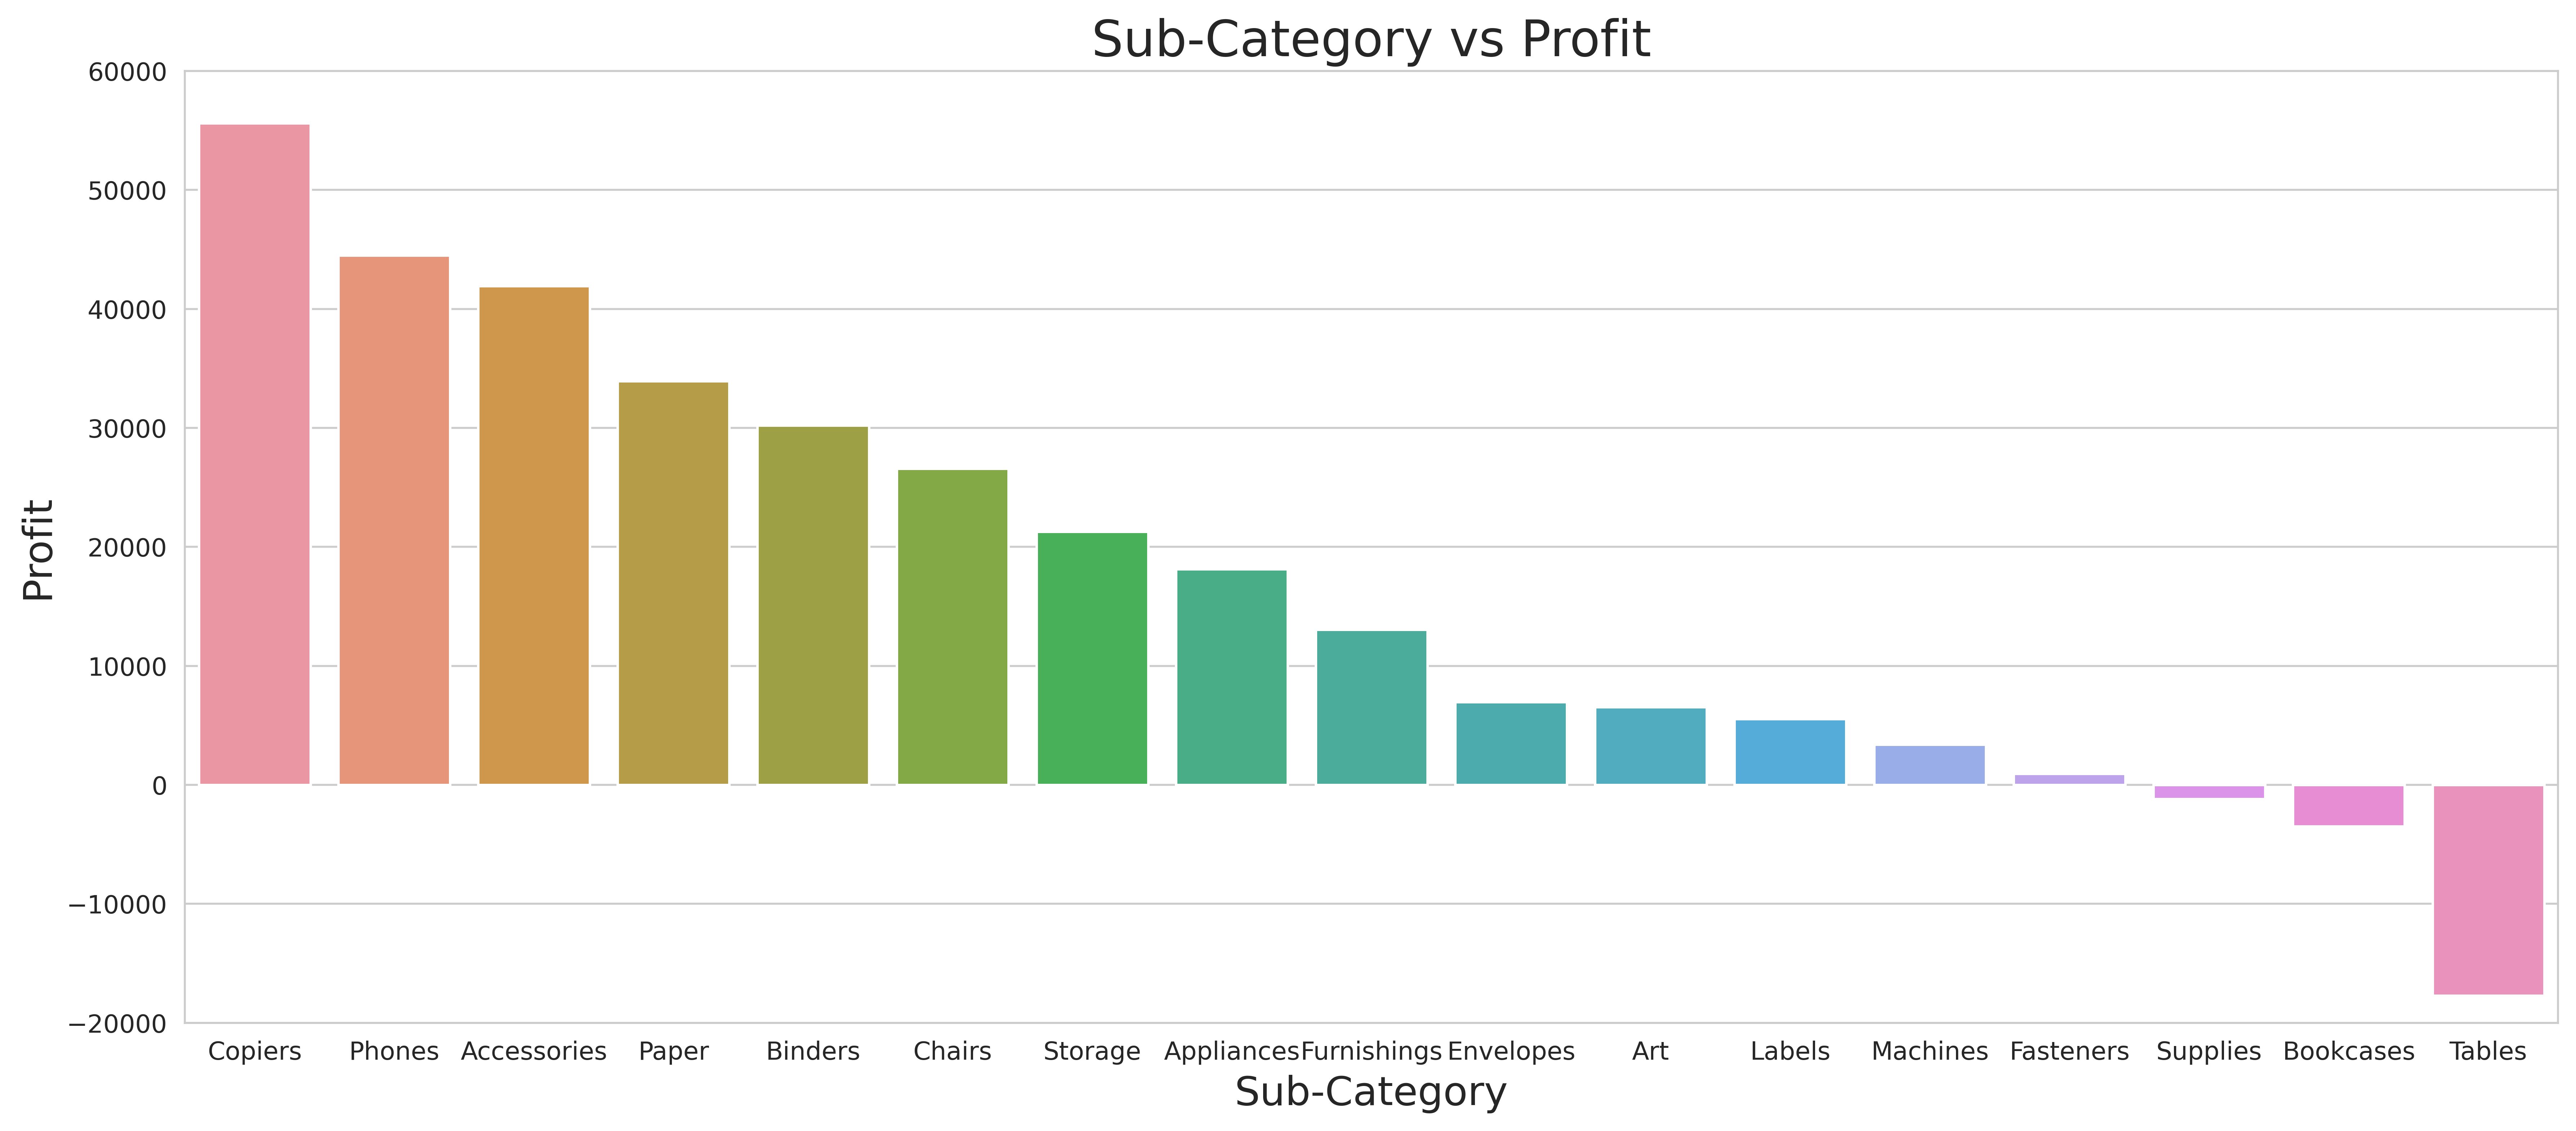

In [22]:
plt.figure(figsize=(17,7),dpi=500)
sns.barplot(x = scp['Sub-Category'], y = scp['Profit'])

sns.set_style("whitegrid")
plt.xlabel("Sub-Category", size=16)
plt.ylabel("Profit", size=16)
plt.title("Sub-Category vs Profit", size=20)
plt.ylim(-20000,60000)

## States With Highest Profit

In [23]:
st = df.groupby(["State"],as_index=False)['Profit'].sum().round(2).sort_values("Profit", ascending=False).reset_index(drop=True)
st.index+=1
sthp = st.head(10)
sthp

,State,Profit
1,California,76330.79
2,New York,74015.46
3,Washington,33368.24
4,Michigan,24428.09
5,Virginia,18597.95
6,Indiana,18382.94
7,Georgia,16250.04
8,Kentucky,11199.70
9,Minnesota,10823.19
10,Delaware,9977.37


**Top Profit** giving States : **California, New York**

(0.0, 80000.0)

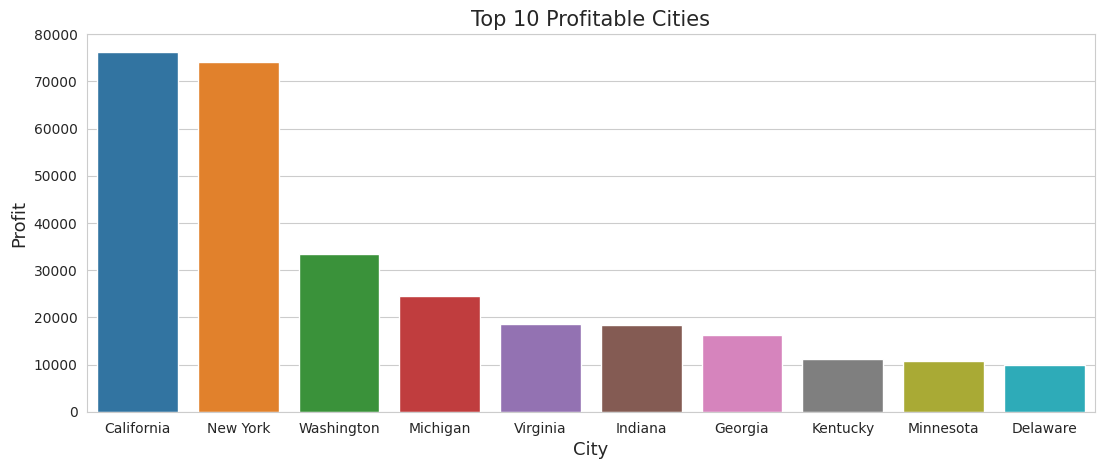

In [24]:
plt.figure(figsize=(13,5),dpi=100)
sns.barplot(x = sthp['State'], y = sthp['Profit'])

sns.set_style("whitegrid")
plt.xlabel("City", size=13)
plt.ylabel("Profit", size=13)
plt.title("Top 10 Profitable Cities", size=15)
plt.ylim(0,80000)


## States With Lowest Profit

**States where we are in Loss ?**

In [25]:
stlp = st.tail(15)
stlp

,State,Profit
35,Maine,454.49
36,South Dakota,394.83
37,North Dakota,230.15
38,West Virginia,185.92
39,Wyoming,100.20
40,Oregon,-1194.10
41,Florida,-3399.30
42,Arizona,-3427.92
43,Tennessee,-5341.69
44,Colorado,-6527.86


**States** Where we are **in Loss** : **Texas, Ohio & almost 10 state where our profit is Negative**

(-30000.0, 5000.0)

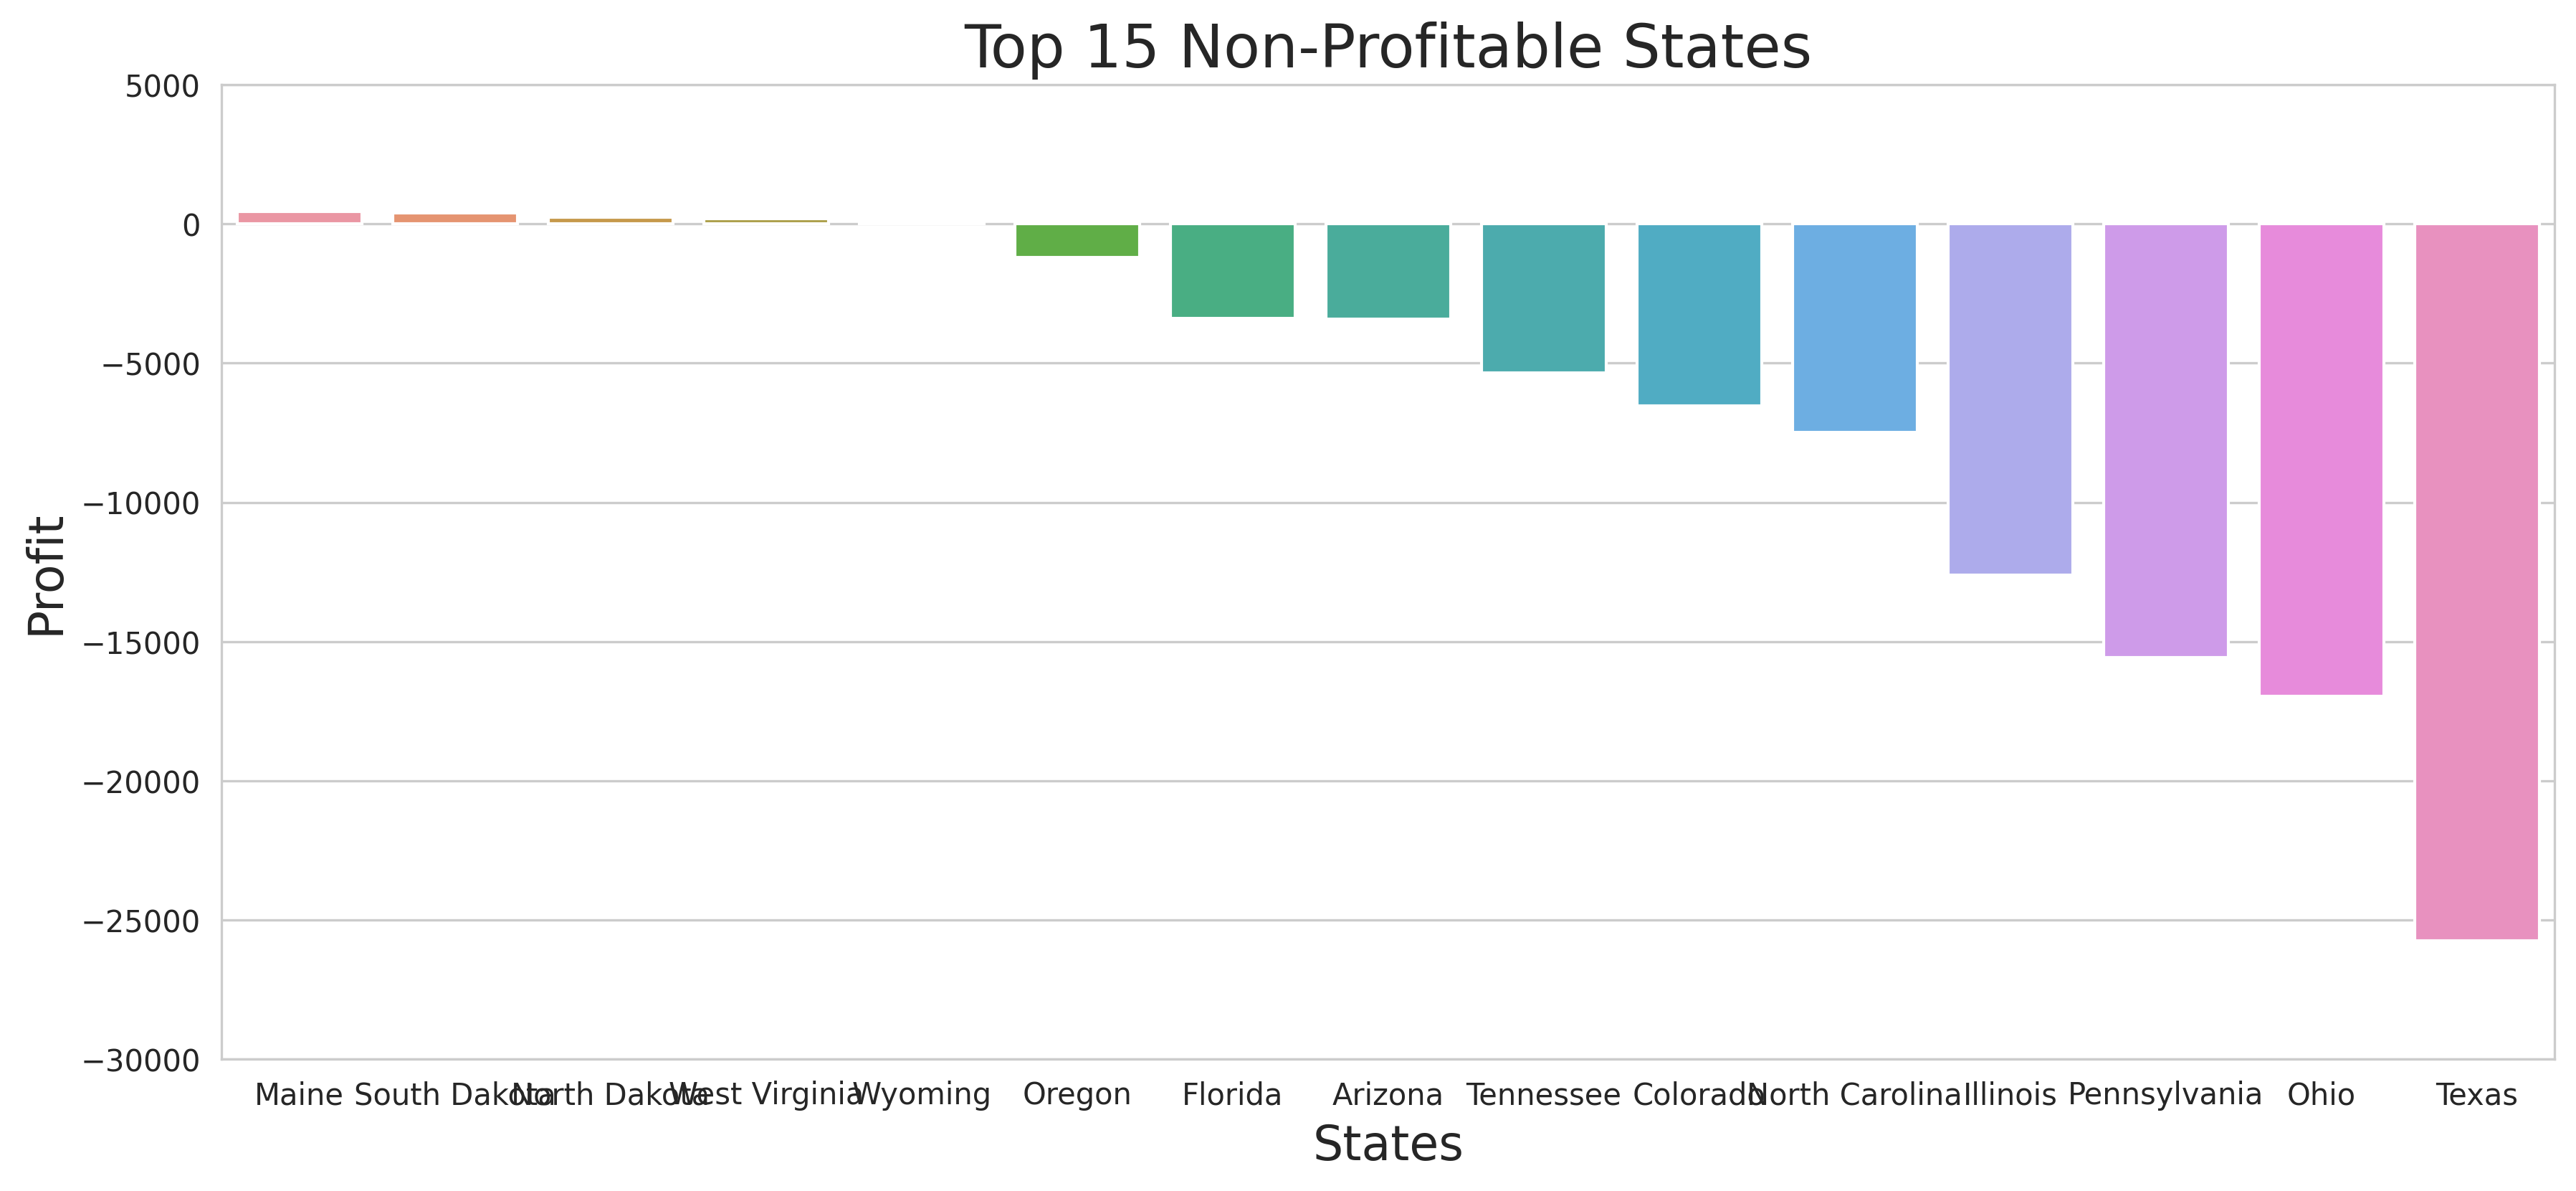

In [26]:
plt.figure(figsize=(14,6),dpi=300)
sns.barplot(x = stlp['State'], y = stlp['Profit'])

sns.set_style("whitegrid")
plt.xlabel("States", size=16)
plt.ylabel("Profit", size=16)
plt.title("Top 15 Non-Profitable States", size=20)
plt.ylim(-30000,5000)


### Cities With Highest Profit

In [27]:
ct = df.groupby(["City"],as_index=False)['Profit'].sum().round(2).sort_values("Profit", ascending=False).reset_index(drop=True)
ct.index+=1
cthp = ct.head(10)
cthp

,City,Profit
1,New York City,62013.90
2,Los Angeles,30431.43
3,Seattle,29121.68
4,San Francisco,17466.12
5,Detroit,13146.69
6,Lafayette,10018.39
7,Jackson,7581.68
8,Atlanta,6993.66
9,Minneapolis,6824.58
10,San Diego,6377.20


(0.0, 70000.0)

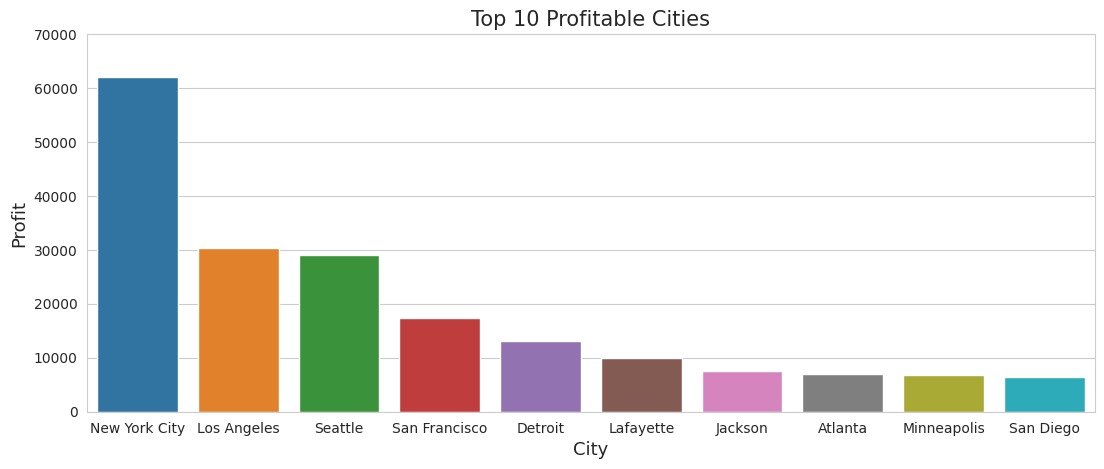

In [28]:
plt.figure(figsize=(13,5),dpi=100)
sns.barplot(x = cthp['City'], y = cthp['Profit'])

sns.set_style("whitegrid")
plt.xlabel("City", size=13)
plt.ylabel("Profit", size=13)
plt.title("Top 10 Profitable Cities", size=15)
plt.ylim(0,70000)


### City With Lowest Profit

In [29]:
ctlp=ct.tail(15)
ctlp

,City,Profit
517,Knoxville,-1165.08
518,Round Rock,-1183.43
519,Medina,-1343.04
520,Louisville,-1430.31
521,Memphis,-1479.04
522,Jacksonville,-2323.83
523,Aurora,-2691.74
524,Phoenix,-2790.88
525,Dallas,-2846.53
526,Burlington,-3622.88


(-14000.0, 2000.0)

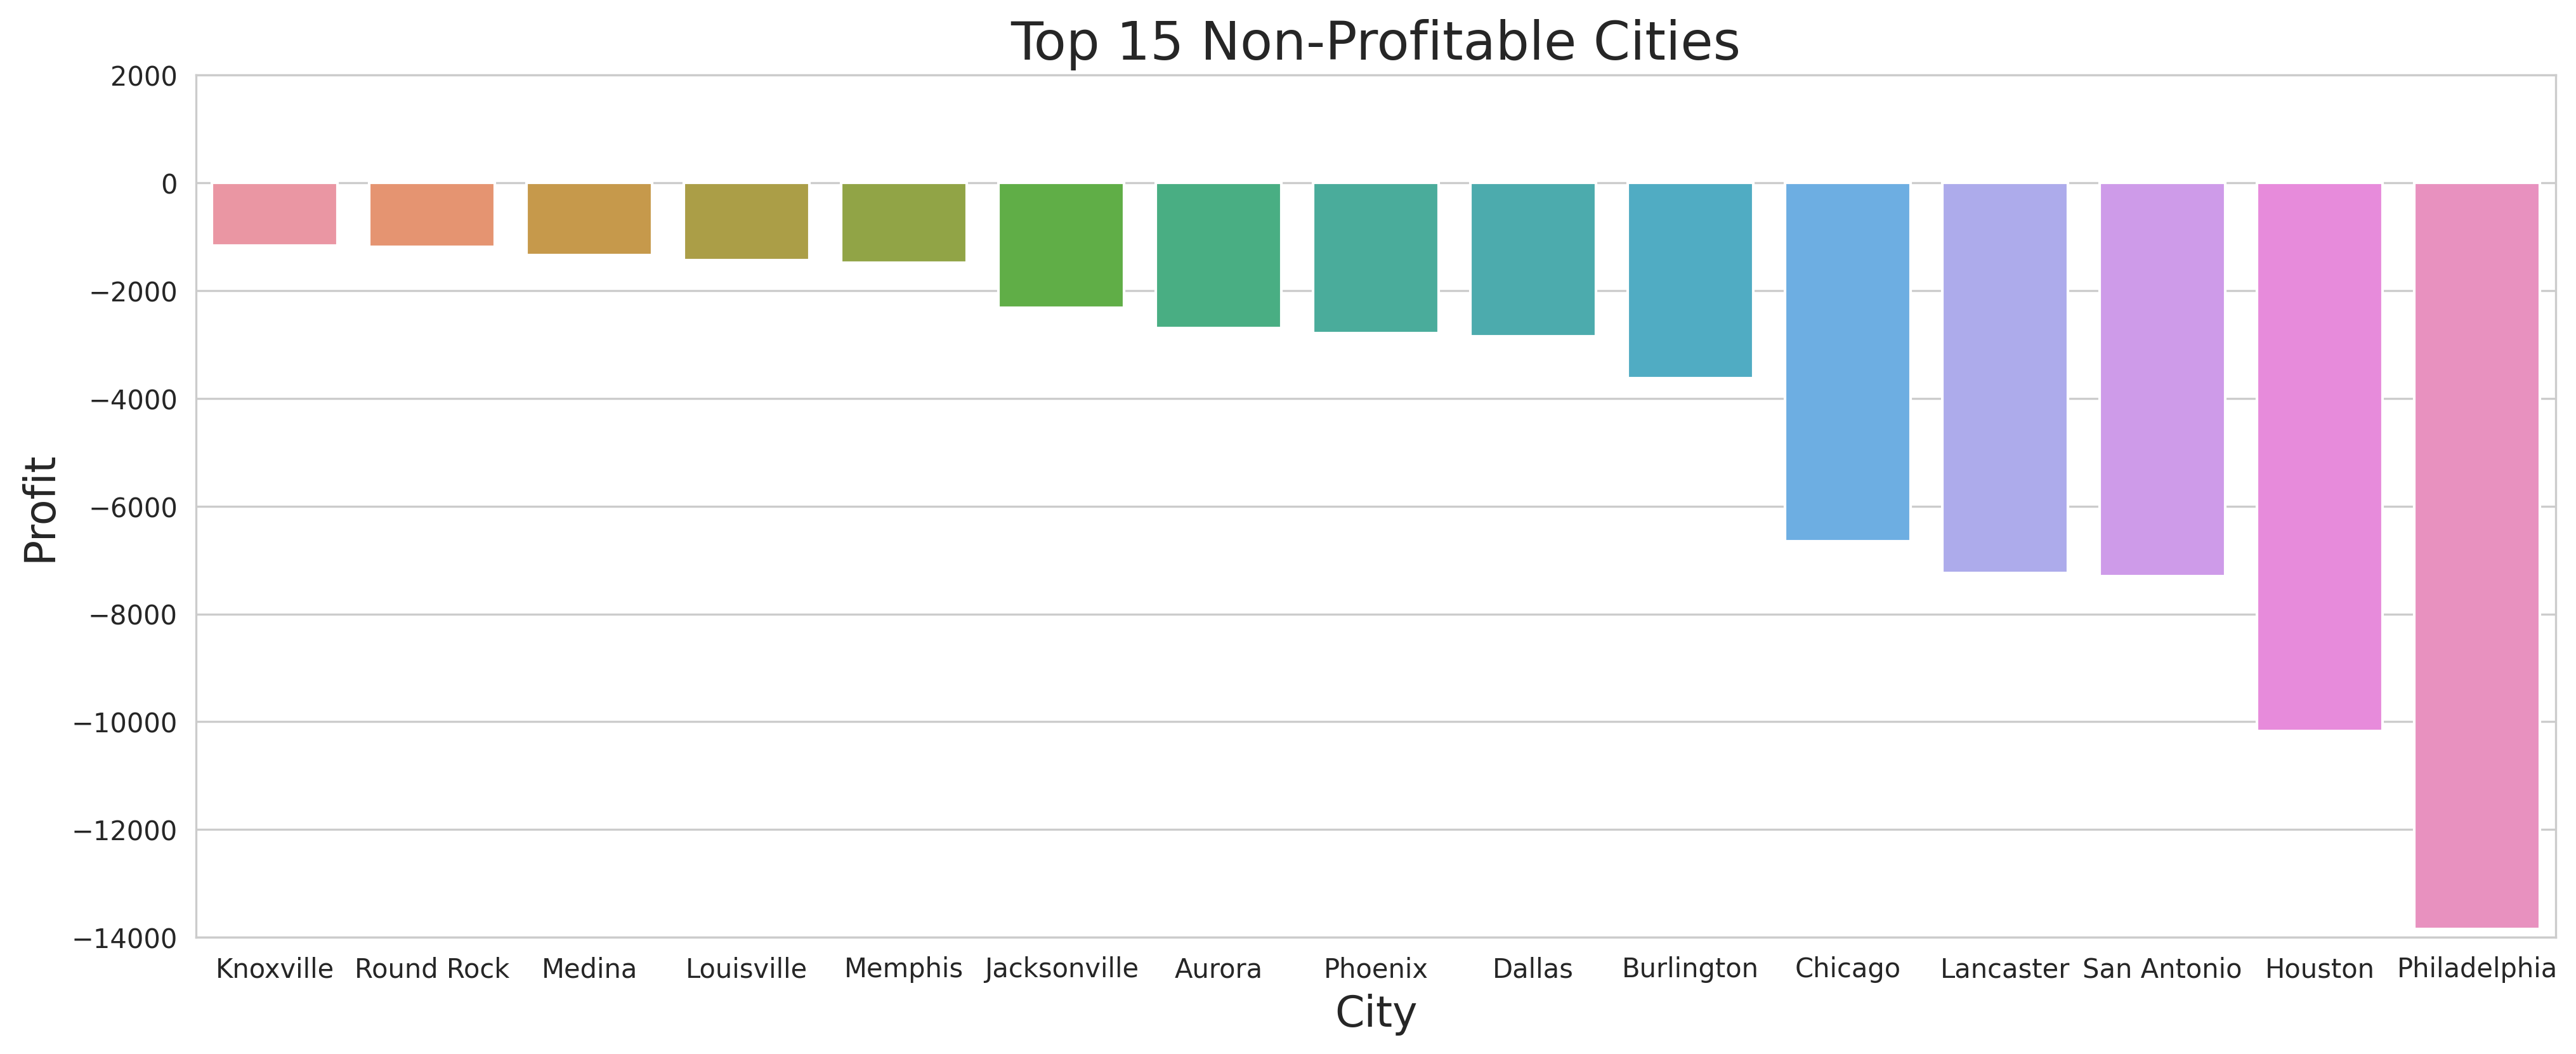

In [30]:
plt.figure(figsize=(16,6),dpi=300)
sns.barplot(x = ctlp['City'], y = ctlp['Profit'])

sns.set_style("whitegrid")
plt.xlabel("City", size=16)
plt.ylabel("Profit", size=16)
plt.title("Top 15 Non-Profitable Cities", size=20)
plt.ylim(-14000,2000)

## Discounts Vs Profit

**What about discounts, is offering more discount on products giving us more profit ?**

In [31]:
disp = df.groupby(['Discount'],as_index = False)['Profit'].sum().round(2).sort_values("Profit", ascending=False).reset_index(drop=True)
disp.index+=1
disp['Discount'] = disp['Discount']*100
disp

,Discount,Profit
1,0.0,320844.41
2,20.0,90306.61
3,10.0,9029.18
4,15.0,1418.99
5,32.0,-2391.14
6,45.0,-2493.11
7,60.0,-5944.66
8,30.0,-10357.22
9,50.0,-20506.43
10,40.0,-23057.05


(-50000.0, 350000.0)

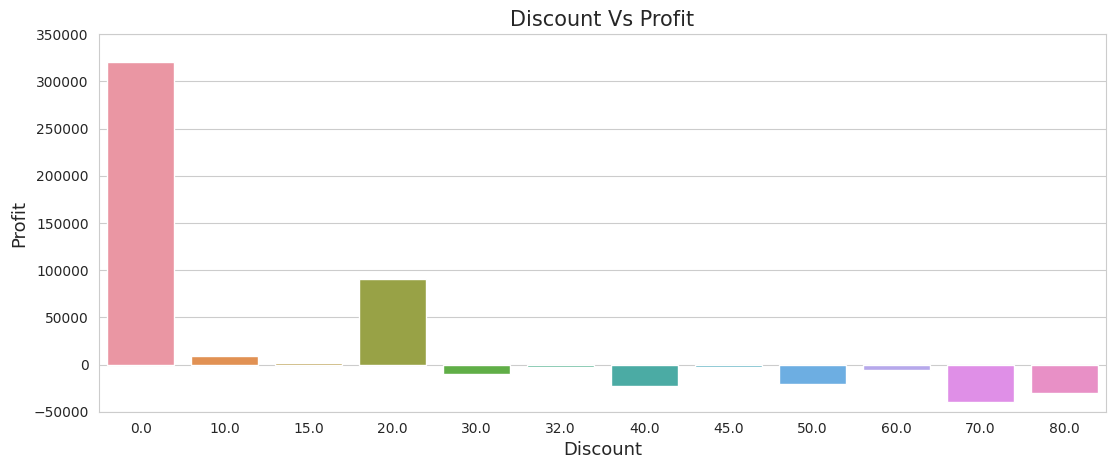

In [32]:
plt.figure(figsize=(13,5),dpi=100)
sns.barplot(x = disp['Discount'], y = disp['Profit'])

sns.set_style("whitegrid")
plt.xlabel("Discount", size=13)
plt.ylabel("Profit", size=13)
plt.title("Discount Vs Profit", size=15)
plt.ylim(-50000,350000)

- **By offering more discounts on products we are lossing our profit.** 
- **We are in loss, if we give more than 20% of discount on any product.** 

# Conclusion From this Analysis

As a business manager, try to find out the weak areas where you can
work to make more profit.

**Shiping Mode With highest Profit** : **Standard Shipping** <br>
**Shiping Mode With Lowest Profit** :  **Same Day Shipping**<br>
**Category With Highest Profit** : **Technology**<br>
**Category With Lowest Profit** : **Furniture**<br>
**Top Selling Products** : **Phones, Chairs, Storage devices**<br> 
**Least Selling Product** : **Fastners**<br>
**Products with Highest Profit** : **Copiers, Phones, Accesories**<br>
**Products with Lowest Profit** : **Tables, Bookcases**<br>
**States Where We are getting More Profit** : **California State, New York State**<br>
**States Where We are facing Losses** : **Texas, Ohio & alomst 10 states where profit is -ve.**<br>
**Most Profitable City** : **New York**<br>
**Most Loss Making Cities** : **Philadelphia, Houston, San Antonio**<br>
**Lastly If We Sell Products with Discounts More than 30% Then we'll lose our Profit.<br>**

--- 
## Task3 Completed !
### Thank You 
#### Aniket Balkhande